In [19]:
import pandas as pd

df= pd.read_csv("..\data\heart.csv")


#print basic information about the dataset
print("Firts ten rows: \n",df.head(10))
print("Total columns: \n", df.columns)




Firts ten rows: 
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3 

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_20020\2626162316.py:3: SyntaxWarning: invalid escape sequence '\d'
  df= pd.read_csv("..\data\heart.csv")


In [20]:
#checkout duplicated values(no of rows)
print("Duplicate rows: ", df.duplicated().sum())

#read first duplicates

duplicates = df[df.duplicated()]
print(duplicates.head(10))    


#see duplicates together
duplicates = df[df.duplicated(keep = False)]
print(duplicates.sort_values(by=list(df.columns)).head(10))

Duplicate rows:  723
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15   34    0   1       118   210    0        1      192      0      0.7   
31   50    0   1       120   244    0        1      162      0      1.1   
43   46    1   0       120   249    0        0      144      0      0.8   
55   55    1   0       140   217    0        1      111      1      5.6   
61   66    0   2       146   278    0        0      152      0      0.0   
64   29    1   1       130   204    0        0      202      0      0.0   
79   52    1   1       134   201    0        1      158      0      0.8   
82   46    1   2       150   231    0        1      147      0      3.6   
83   38    1   2       138   175    0        1      173      0      0.0   
84   37    0   2       120   215    0        1      170      0      0.0   

    slope  ca  thal  target  
15      2   0     2       1  
31      2   0     2       1  
43      2   0     3       0  
55      0   0     3       0  
61 

In [21]:
# Count frequency of all rows
row_counts = df.value_counts()
print(row_counts[row_counts > 1])


df_clean = df.drop_duplicates()
print("Rows before:", len(df))
print("Rows after removing duplicates:", len(df_clean))

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         8
61   1    0   148       203   0    1        161      0      0.0      2      1   3     0         4
              138       166   0    0        125      1      3.6      1      1   2     0         4
52   1    0   112       230   0    1        160      0      0.0      2      1   2     0         4
              125       212   0    1        168      0      1.0      2      2   3     0         4
                                                                                               ..
53   0    0   130       264   0    0        143      0      0.4      1      0   2     1         3
              138       234   0    0        160      0      0.0      2      0   2     1         3
          2   128       216   0    0        115      0      0.0      2      0   0     1         3
     1    0   142       2

In [22]:
#check missing values
print("Missing values in each column:\n", df.isnull().sum())



Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [23]:
#save cleaned dataset
df_clean.to_csv("../data/heart_cleaned.csv", index=False)


#load cleaned dataset
df_loaded = pd.read_csv("../data/heart_cleaned.csv")
print("Loaded cleaned dataset rows:", len(df_loaded))

#verify no duplicates in loaded dataset
print("Duplicate rows in loaded dataset:", df_loaded.duplicated().sum())

#verify no missing values in loaded dataset
print("Missing values in each column of loaded dataset:\n", df_loaded.isnull().sum())


Loaded cleaned dataset rows: 302
Duplicate rows in loaded dataset: 0
Missing values in each column of loaded dataset:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [24]:
#numeric features statistics by target variable
# target = 0  no heart disease
group_0 = df[df['target'] == 0]

# target = 1  heart disease
group_1 = df[df['target'] == 1]


features = ['age','trestbps','chol','thalach','oldpeak']

for col in features:
    print(f"\nFeature: {col}")
    print("Mean (No Disease):", group_0[col].mean())
    print("Mean (Disease):", group_1[col].mean())
    print("Median (No Disease):", group_0[col].median())
    print("Median (Disease):", group_1[col].median())
    print("Std (No Disease):", group_0[col].std())
    print("Std (Disease):", group_1[col].std())



Feature: age
Mean (No Disease): 56.569138276553105
Mean (Disease): 52.40874524714829
Median (No Disease): 58.0
Median (Disease): 52.0
Std (No Disease): 7.9081530712874635
Std (Disease): 9.631804436776662

Feature: trestbps
Mean (No Disease): 134.1062124248497
Mean (Disease): 129.24524714828897
Median (No Disease): 130.0
Median (Disease): 130.0
Std (No Disease): 18.57673604191136
Std (Disease): 16.112187822111316

Feature: chol
Mean (No Disease): 251.2925851703407
Mean (Disease): 240.97908745247148
Median (No Disease): 249.0
Median (Disease): 234.0
Std (No Disease): 49.55892364429828
Std (Disease): 53.010345260991095

Feature: thalach
Mean (No Disease): 139.1302605210421
Mean (Disease): 158.58555133079847
Median (No Disease): 142.0
Median (Disease): 161.5
Std (No Disease): 22.56523488541612
Std (Disease): 19.096928209237966

Feature: oldpeak
Mean (No Disease): 1.6002004008016033
Mean (Disease): 0.5699619771863118
Median (No Disease): 1.4
Median (Disease): 0.2
Std (No Disease): 1.290955

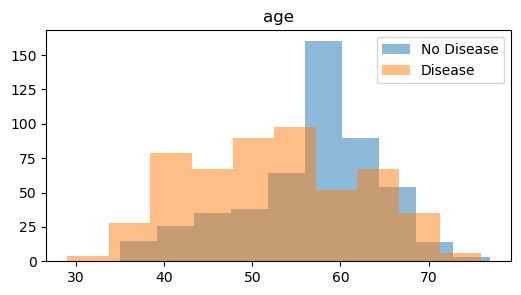

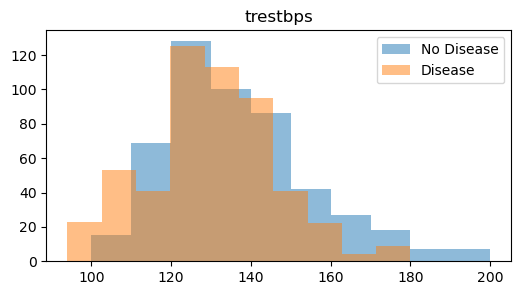

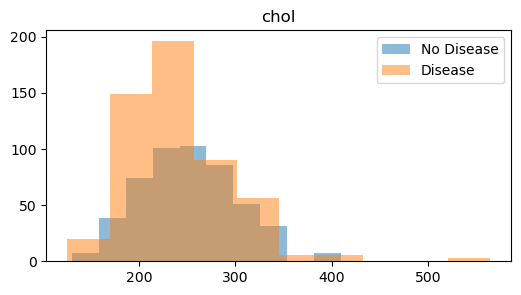

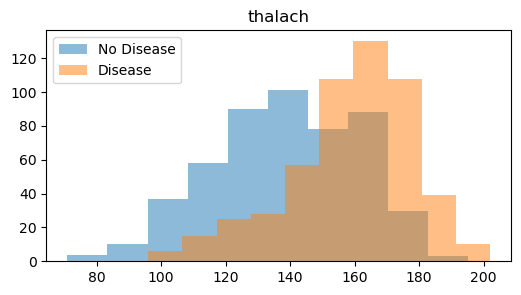

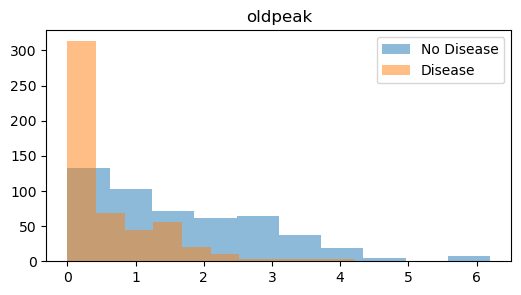

In [25]:
import matplotlib.pyplot as plt

for col in features:
    plt.figure(figsize=(6,3))
    plt.hist(group_0[col], alpha=0.5, label='No Disease')
    plt.hist(group_1[col], alpha=0.5, label='Disease')
    plt.title(col)
    plt.legend()
    plt.show()
